In [1]:
import copy

In [2]:
def vector_subtraction(u,v):
    if len(u) != len(v):
        print("벡터의 크기가 다릅니다.")
        return
    
    t = [0 for j in range(len(u))]
    for i in range(len(u)):
        t[i] = u[i] - v[i]
    return t

In [3]:
def vector_scalar_mult(u,k):
    v = u.copy()
    for j in range(len(u)):
        v[j] *= k
    return v

In [4]:
def vector_inner_product(u,v):
    if len(u) != len(v):
        print("벡터의 크기가 다릅니다.")
        return
    
    val = 0
    for i in range(len(u)):
        val += u[i] * v[i]
    return val

In [5]:
def vector_outer_product(u,v):
    nu = len(u)
    nv = len(v)
    
    t = [[0 for j in range(nv)] for i in range(nu)]
    for i in range(nu):
        for j in range(nv):
            t[i][j] = u[i] * v[j]
    return t

In [6]:
def is_matrix(A):
    m = len(A)
    n = len(A[0])
    for i in range(1,m):
        if len(A[i]) != n:
            return (0,0)
    return (m,n)

In [7]:
def matrix_zeros(m,n):
    return [[0 for j in range(n)] for i in range(m)]

In [8]:
def matrix_identity(n):
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

In [9]:
def matrix_subtraction(A,B):
    if is_matrix(A) == (0,0):
        print("A는 행렬이 아닙니다.")
        return
    if is_matrix(B) == (0,0):
        print("B는 행렬이 아닙니다.")
        return
    
    mA, nA = len(A), len(A[0])
    mB, nB = len(B), len(B[0])
    
    if mA != mB or nA != nB:
        print("행렬의 크기가 다릅니다.")
        return
    
    C = matrix_zeros(mA,nA)
    for i in range(mA):
        for j in range(nA):
            C[i][j] = A[i][j] - B[i][j]
    return C

In [10]:
def matrix_transpose(A):
    if is_matrix(A) == (0,0):
        print("A는 행렬이 아닙니다.")
        return
    
    mA, nA = len(A), len(A[0])
    
    C = matrix_zeros(nA,mA)
    for i in range(nA):
        for j in range(mA):
            C[i][j] = A[j][i]
    return C

In [11]:
def matrix_scalar_mult(A,k):
    if is_matrix(A) == (0,0):
        print("A는 행렬이 아닙니다.")
        return
    
    mA, nA = len(A), len(A[0])
    
    C = matrix_zeros(mA,nA)
    for i in range(mA):
        for j in range(nA):
            C[i][j] = k * A[i][j]
    return C

In [12]:
def matrix_vector_mult(A,x):
    if is_matrix(A) == (0,0):
        print("A는 행렬이 아닙니다.")
        return
    
    mA, nA = len(A), len(A[0])
        
    if nA != len(x):
        print("차원이 맞지 않아 계산할 수 없습니다.")
        return
    
    v = [0 for j in range(mA)]
    for i in range(mA):
        for j in range(nA):
            v[i] += A[i][j] * x[j]
    return v

In [13]:
def matrix_mult(A,B):
    if is_matrix(A) == (0,0):
        print("A는 행렬이 아닙니다.")
        return
    if is_matrix(B) == (0,0):
        print("A는 행렬이 아닙니다.")
        return
    
    mA, nA = len(A), len(A[0])
    mB, nB = len(B), len(B[0])
    
    if nA != mB:
        print("차원이 맞지 않아 계산할 수 없습니다.")
        return
    
    C = matrix_zeros(mA,nB)
    for i in range(mA):
        for k in range(nB):
            for j in range(nA):
                C[i][k] += A[i][j] * B[j][k]
    return C

In [14]:
def lu(A):
    mA, nA = is_matrix(A)
    if mA == 0:
        print("A는 행렬이 아닙니다.")
        return
    if mA != nA:
        print("A는 정사각 행렬이 아닙니다.")
        return
    
    C = copy.deepcopy(A)
    for k in range(mA-1): # for k=1 to n-1
        for i in range(k+1, mA): # for i=k+1 to n
            xmult = C[i][k]/C[k][k] # xmult <- a_{ik}/a_{kk}
            C[i][k] = xmult # a_{ik} <- xmult 
            for j in range(k+1, mA): # for j=k+1 to n
                C[i][j] -= xmult * C[k][j] # a_{ij} <- a_{ij} - (xmult)a_{kj} 
    return C

In [15]:
def solve_lu(A,b):
    N = len(A)
    x = [0 for j in range(N)]
    for k in range(N-1):
        for i in range(k+1,N):
            b[i] -= A[i][k] * b[k]
    
    x[-1] = b[-1] / A[-1][-1]
    for i in range(N-2,-1,-1):
        s = b[i]
        for j in range(i+1,N):
            s -= A[i][j] * x[j]
        x[i] = s / A[i][i]
    return x

In [16]:
def Householder_QR(A):
    mA,nA = is_matrix(A)
    R = copy.deepcopy(A)
    Q = matrix_identity(mA)
    I = matrix_identity(mA)
    
    for k in range(min(nA,mA-1)):
        val = 0
        for j in range(k,mA):
            val += R[j][k]**2
        alpha = -(R[k][k]/abs(R[k][k])) * val**(1/2)
        e = [0 for j in range(mA)]
        e[k] = 1
        tmp = [0 for j in range(k)] + [R[j][k] for j in range(k,mA)]
        v =  vector_subtraction(tmp, vector_scalar_mult(e,alpha))
        beta = vector_inner_product(v,v)
        if beta == 0:
            continue
        H = matrix_scalar_mult(vector_outer_product(v,v), 2/beta)
        H = matrix_subtraction(I,H)
        Q = matrix_mult(H,Q)
        R = matrix_mult(H,R)
    return matrix_transpose(Q), R

In [17]:
def vector_norm(u):
    val = 0
    for i in range(len(u)):
        val += u[i] **2
    return val**(1/2)

In [18]:
def Gram_Schmidt_QR(A):
    mA, nA = is_matrix(A)
    Q = matrix_zeros(nA,mA)
    R = matrix_zeros(nA,nA)
    for k in range(nA):
        Q[k] = [A[j][k] for j in range(mA)]
        a = [A[i][k] for i in range(mA)]
        for j in range(k):
            R[j][k] = vector_inner_product(Q[j],a)
            tmp = vector_scalar_mult(Q[j],R[j][k])
            Q[k] = vector_subtraction(Q[k], tmp)
        R[k][k] = vector_norm(Q[k])
        if R[k][k] == 0: return 0, 0
        Q[k] = vector_scalar_mult(Q[k], 1/R[k][k])
    return matrix_transpose(Q), R

**<span style="font-size: 20px; color: blue">(Exercise 1) Linear Least Squares </span>** 

다음 데이터를 잘 표현하는 최적의 직선 $y = a + bx$를 찾으시오.

|$x$|$0$|$1$|$1$|$2$|$2$|$3$|$4$|
|---:|---:|---:|---:|---:|---:|---:|---:|
|$y$|$-1$|$2$|$1$|$4$|$3$|$5$|$4$|

- 행렬 $A\in\mathbb{R}^{m\times n}$와 벡터 $\boldsymbol{c}\in\mathbb{R}^m$를 입력 받아 정규방정식을 해결하여 벡터 $\boldsymbol{x}\in\mathbb{R}^n$는 함수 least_squares()를 정의하시오.

### 혼자

In [19]:
def least_squares(A,c):
    C = matrix_mult(matrix_transpose(A),A)
    b = matrix_vector_mult(matrix_transpose(A),c)
    x = solve_lu(lu(C),b)
    return x

In [20]:
A = [[1,0],[1,1],[1,1],[1,2],[1,2],[1,3],[1,4]]
c = [-1,2,1,4,3,5,4]

In [21]:
x = least_squares(A,c)

In [22]:
print(x)

[0.07894736842105335, 1.3421052631578945]


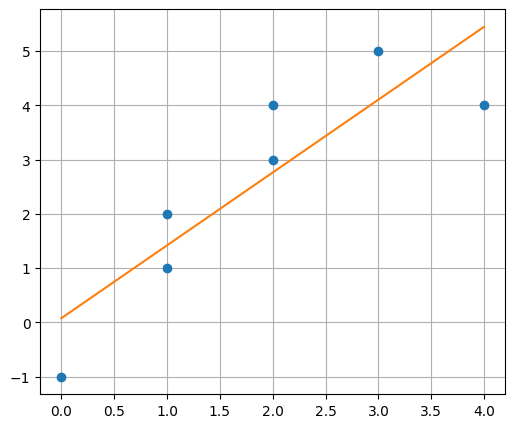

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,5)
x0 = [0,1,2,3,4]
y0 = [i*x[1]+x[0] for i in x0]
x1 = [0,1,1,2,2,3,4]
y1 = [-1,2,1,4,3,5,4]
plt.plot(x1,y1,'o')
plt.plot(x0,y0)
plt.grid()
plt.show()

다음 데이터를 잘 표현하는 최적의 곡선 $y = ax^2 + bx + c$를 찾으시오.

|$x$|$0.0$|$0.5$|$1.0$|$1.5$|$2.0$|$2.5$|$3.0$|$3.5$|$4.0$|$4.5$|$5.0$|$5.5$|$6.0$|$6.5$|$7.0$|$7.5$|$8.0$|$8.5$|$9.0$|$9.5$|$10.0$|
---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
|$y$|$2.9$|$2.7$|$4.8$|$5.3$|$7.1$|$7.6$|$7.7$|$7.6$|$9.4$|$9.0$|$9.6$|$10.0$|$10.2$|$9.7$|$8.3$|$8.4$|$9.0$|$8.3$|$6.6$|$6.7$|$4.1$|

In [50]:
x = [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0]
A = [[1, xval, xval**2] for xval in x]
c = [2.9,2.7,4.8,5.3,7.1,7.6,7.7,7.6,9.4,9.0,9.6,10.0,10.2,9.7,8.3,8.4,9.0,8.3,6.6,6.7,4.1]

In [51]:
x0 = least_squares(A,c)
print(x0)

[2.1757199322416776, 2.670413385241756, -0.23844393592677302]


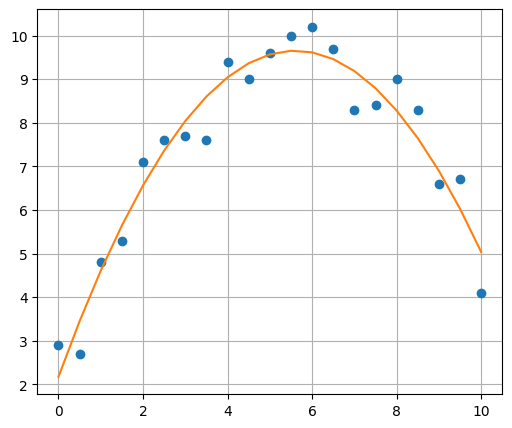

In [52]:
y = [(i*i*x0[2] + i*x0[1] + x0[0]) for i in x]
plt.plot(x,c,'o')
plt.plot(x,y)
plt.grid()
plt.show()

**<span style="font-size: 20px; color: blue">(Exercise 1) Linear Least Squares </span>** 

다음 데이터를 잘 표현하는 최적의 직선 $y = a + bx$를 찾으시오.

|$x$|$0$|$1$|$1$|$2$|$2$|$3$|$4$|
|---:|---:|---:|---:|---:|---:|---:|---:|
|$y$|$-1$|$2$|$1$|$4$|$3$|$5$|$4$|

- 행렬 $A\in\mathbb{R}^{m\times n}$와 벡터 $\boldsymbol{c}\in\mathbb{R}^m$를 입력 받아 정규방정식을 해결하여 벡터 $\boldsymbol{x}\in\mathbb{R}^n$는 함수 least_squares()를 정의하시오.

### 교수님

In [27]:
def least_squares(A,c):
    A_T = matrix_transpose(A)
    AA = matrix_mult(A_T,A)
    cc = matrix_vector_mult(A_T,c)
    C = lu(AA)
    x = solve_lu(C,cc)
    return x

In [53]:
x1 = [0,1,1,2,2,3,4]
A = [[1,0],[1,1],[1,1],[1,2],[1,2],[1,3],[1,4]]
c = [-1,2,1,4,3,5,4]

In [54]:
x = least_squares(A,c)

In [55]:
print(x)

[0.07894736842105335, 1.3421052631578945]


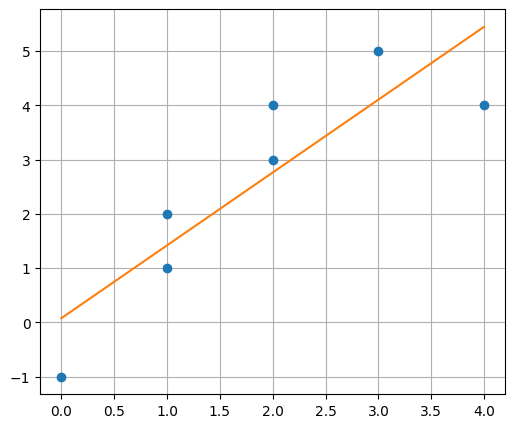

In [56]:
y = [(i*x[1] + x[0]) for i in x1]
plt.plot(x1,c,'o')
plt.plot(x1,y)
plt.grid()
plt.show()

다음 데이터를 잘 표현하는 최적의 곡선 $y = ax^2 + bx + c$를 찾으시오.

|$x$|$0.0$|$0.5$|$1.0$|$1.5$|$2.0$|$2.5$|$3.0$|$3.5$|$4.0$|$4.5$|$5.0$|$5.5$|$6.0$|$6.5$|$7.0$|$7.5$|$8.0$|$8.5$|$9.0$|$9.5$|$10.0$|
---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
|$y$|$2.9$|$2.7$|$4.8$|$5.3$|$7.1$|$7.6$|$7.7$|$7.6$|$9.4$|$9.0$|$9.6$|$10.0$|$10.2$|$9.7$|$8.3$|$8.4$|$9.0$|$8.3$|$6.6$|$6.7$|$4.1$|

In [64]:
x1 = [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0]
A = [[1, xval, xval**2] for xval in x1]
c = [2.9,2.7,4.8,5.3,7.1,7.6,7.7,7.6,9.4,9.0,9.6,10.0,10.2,9.7,8.3,8.4,9.0,8.3,6.6,6.7,4.1]

In [65]:
x = least_squares(A,c)
print(x)

[2.1757199322416776, 2.670413385241756, -0.23844393592677302]


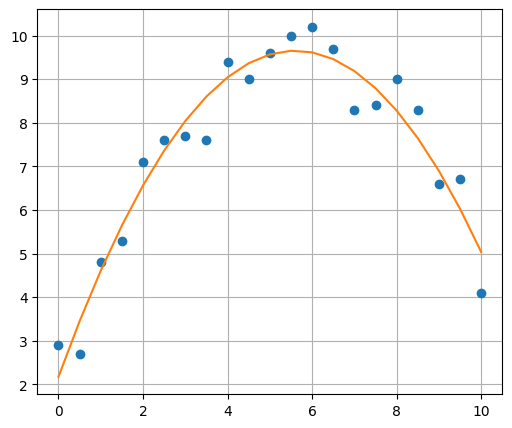

In [66]:
y = [(i*i*x[2] + i*x[1] + x[0]) for i in x1]
plt.plot(x1,c,'o')
plt.plot(x1,y)
plt.grid()
plt.show()

**<span style="font-size: 20px; color: blue">(Exercise 2) Linear Least Squares with QR </span>** 

다음 데이터를 잘 표현하는 최적의 직선 $y = ax + b$를 찾으시오.

|$x$|$0$|$1$|$1$|$2$|$2$|$3$|$4$|
|---:|---:|---:|---:|---:|---:|---:|---:|
|$y$|$-1$|$2$|$1$|$4$|$3$|$5$|$4$|

- 행렬 $A\in\mathbb{R}^{m\times n}$와 벡터 $\boldsymbol{c}\in\mathbb{R}^m$를 입력 받아 Householder QR factorization을 이용하여 벡터 $\boldsymbol{x}\in\mathbb{R}^n$는 함수 least_squares_QR_H()를 정의하시오.

In [33]:
A = [[1,0],[1,1],[1,1],[1,2],[1,2],[1,3],[1,4]]
c = [-1,2,1,4,3,5,4]

### 혼자

In [34]:
def least_squares_QR_H(A,c):
    n,m = len(A),len(A[0])
    Q,R = Householder_QR(A)
    Q_T = matrix_transpose(Q)
    cc = matrix_vector_mult(Q_T[:m],c)
    R = R[:m]
    x = [0 for _ in range(m)]
    x[-1] = cc[-1]/R[-1][-1]
    for i in range(m-2,-1,-1):
        val=0
        for j in range(i+1,m):
            val += x[j]*R[i][j]
        x[i] = (cc[i]-val)/R[i][i]
    return x

In [35]:
x = least_squares_QR_H(A,c)

In [36]:
print(x)

[0.07894736842105306, 1.3421052631578947]


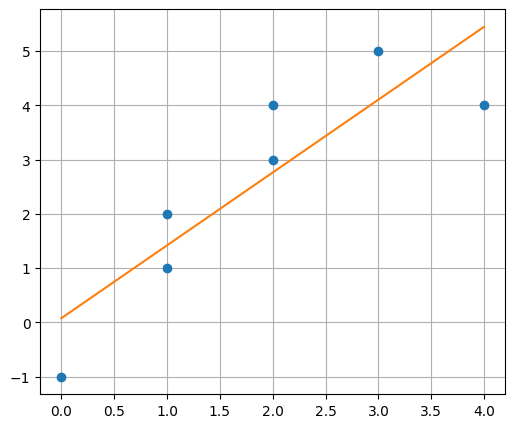

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,5)
x0 = [0,1,2,3,4]
y0 = [i*x[1]+x[0] for i in x0]
x1 = [0,1,1,2,2,3,4]
y1 = [-1,2,1,4,3,5,4]
plt.plot(x1,y1,'o')
plt.plot(x0,y0)
plt.grid()
plt.show()

### 교수님

In [38]:
def least_squares_QR_H(A,c):
    Q,R = Householder_QR(A)
    b = matrix_vector_mult(matrix_transpose(Q),c)
    N = len(R[0])
    x = [0 for j in range(N)]

    x[-1] = b[N-1]/R[N-1][N-1]
    for i in range(N-2,-1,-1):
        s = b[i]
        for j in range(i+1,N):
            s -= R[i][j]*x[j]
        x[i] = s/R[i][i]
    return x

In [39]:
x = least_squares_QR_H(A,c)
print(x)

[0.07894736842105306, 1.3421052631578947]


- 행렬 $A\in\mathbb{R}^{m\times n}$와 벡터 $\boldsymbol{c}\in\mathbb{R}^m$를 입력 받아 Gram-Schmidt Orthogonalization을 이용하여 벡터 $\boldsymbol{x}\in\mathbb{R}^n$는 함수 least_squares_QR_GS()를 정의하시오.

In [40]:
def least_squares_QR_GS(A,c):
    n,m = len(A),len(A[0])
    Q,R = Gram_Schmidt_QR(A)
    Q_T = matrix_transpose(Q)
    cc = matrix_vector_mult(Q_T[:m],c)
    R = R[:m]
    x = [0 for _ in range(m)]
    x[-1] = cc[-1]/R[-1][-1]
    for i in range(m-2,-1,-1):
        val=0
        for j in range(i+1,m):
            val += x[j]*R[i][j]
        x[i] = (cc[i]-val)/R[i][i]
    return x

In [41]:
x = least_squares_QR_GS(A,c)

In [42]:
print(x)

[0.07894736842105038, 1.342105263157896]


다음 데이터를 잘 표현하는 최적의 곡선 $y = ax^2 + bx + c$를 찾으시오.

|$x$|$0.0$|$0.5$|$1.0$|$1.5$|$2.0$|$2.5$|$3.0$|$3.5$|$4.0$|$4.5$|$5.0$|$5.5$|$6.0$|$6.5$|$7.0$|$7.5$|$8.0$|$8.5$|$9.0$|$9.5$|$10.0$|
---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
|$y$|$2.9$|$2.7$|$4.8$|$5.3$|$7.1$|$7.6$|$7.7$|$7.6$|$9.4$|$9.0$|$9.6$|$10.0$|$10.2$|$9.7$|$8.3$|$8.4$|$9.0$|$8.3$|$6.6$|$6.7$|$4.1$|

In [43]:
x = [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0]
A = [[1, xval, xval**2] for xval in x]
c = [2.9,2.7,4.8,5.3,7.1,7.6,7.7,7.6,9.4,9.0,9.6,10.0,10.2,9.7,8.3,8.4,9.0,8.3,6.6,6.7,4.1]

In [44]:
x = least_squares_QR_H(A,c)
print(x)

[2.1757199322416705, 2.670413385241761, -0.23844393592677351]


In [45]:
x = least_squares_QR_GS(A,c)
print(x)

[2.175719932241679, 2.670413385241756, -0.23844393592677304]
